# Converting CSV to Shapefile
This program is for:
   1. Converting csv file to shapefile using geopandas and shapely labraries
   2. Ploting more than shapefile in the same map
   
## 1. CSV to geoDataFrame

In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import contextily as cx

In [4]:
# Reading dataframe csv file 
data = pd.read_csv("C:/Courses_Projects/Geographic_Data_Science/Pollution_Kirkuk_oilfield/layer220914.csv")
data.head()

,site NO.,name_stati,x,y,CO,SO2,NO2,O3,CO2,H2S,pm1,pm2_5,pm5,pm10,long,lati
0,1,K1 Hospital Entry,437290.8,3931183,0.81,0.60,0.55,0.04,395,0.71,11,27,92,110,44.308371,35.522268
1,2,Ganesa 1,437047.9,3931793,0.65,0.51,0.55,0.04,401,0.69,8,22,78,105,44.305644,35.527752
2,3,Ganesa 2,436656.3,3932154,1.01,0.69,0.60,0.05,390,0.70,6,18,75,99,44.301297,35.530982
3,4,Treatment Unit,437489.3,3933941,0.39,0.61,0.53,0.02,341,0.95,6,8,32,58,44.310347,35.547146
4,5,Baba Compound,439236.7,3932981,0.42,0.99,0.36,0.03,350,1.30,4,8,34,58,44.329696,35.538600


In [5]:
# Creating Geometry column 
data['Coordinates'] = list(zip(data['long'],data['lati']))

# Making coordinate column Shapely opjects
data['Coordinates'] = data['Coordinates'].apply(Point)

In [6]:
# Casting dataframe as geodatafram (converting csv to shp)
geoData = gpd.GeoDataFrame(data, geometry= 'Coordinates')
geoData.head()

,site NO.,name_stati,x,y,CO,SO2,NO2,O3,CO2,H2S,pm1,pm2_5,pm5,pm10,long,lati,Coordinates
0,1,K1 Hospital Entry,437290.8,3931183,0.81,0.60,0.55,0.04,395,0.71,11,27,92,110,44.308371,35.522268,POINT (44.30837 35.52227)
1,2,Ganesa 1,437047.9,3931793,0.65,0.51,0.55,0.04,401,0.69,8,22,78,105,44.305644,35.527752,POINT (44.30564 35.52775)
2,3,Ganesa 2,436656.3,3932154,1.01,0.69,0.60,0.05,390,0.70,6,18,75,99,44.301297,35.530982,POINT (44.30130 35.53098)
3,4,Treatment Unit,437489.3,3933941,0.39,0.61,0.53,0.02,341,0.95,6,8,32,58,44.310347,35.547146,POINT (44.31035 35.54715)
4,5,Baba Compound,439236.7,3932981,0.42,0.99,0.36,0.03,350,1.30,4,8,34,58,44.329696,35.538600,POINT (44.32970 35.53860)


C:\Users\HP\anaconda3\envs\geoenv\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


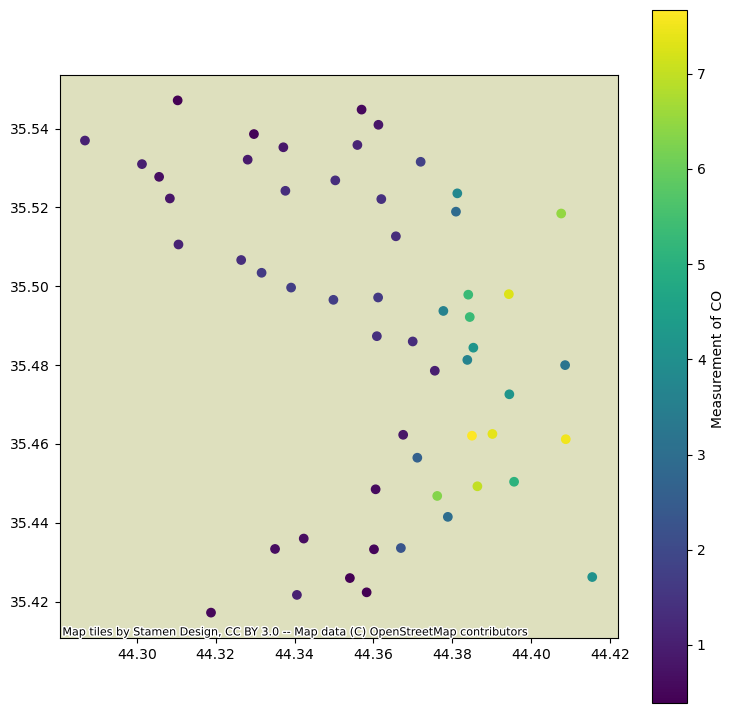

In [9]:
url1="C:/Courses_Projects/Geographic_Data_Science/Pollution_Kirkuk_oilfield/Measurement1_1m_GeoJSON/Measurement1_1m.shp"
shp1= gpd.read_file(url1)

geoData.crs = shp1.crs
#geoData.to_crs(3395,inplace=True)
ax =geoData.plot(figsize = (9,9), column = "CO",
            legend= True,
            legend_kwds={'label': "Measurement of CO ", 'orientation': "vertical"})

cx.add_basemap(ax, crs=geoData.crs, source=cx.providers.Stamen.Terrain, cmap='Blues',)  #notice that basemap is not added to the
                                                                                        #ploted geodatafram, where crs need to
                                                                                        #be checked


  ## 2. Compining more than one plot in one figue

In [10]:
#loading data world and cities
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

<AxesSubplot: >

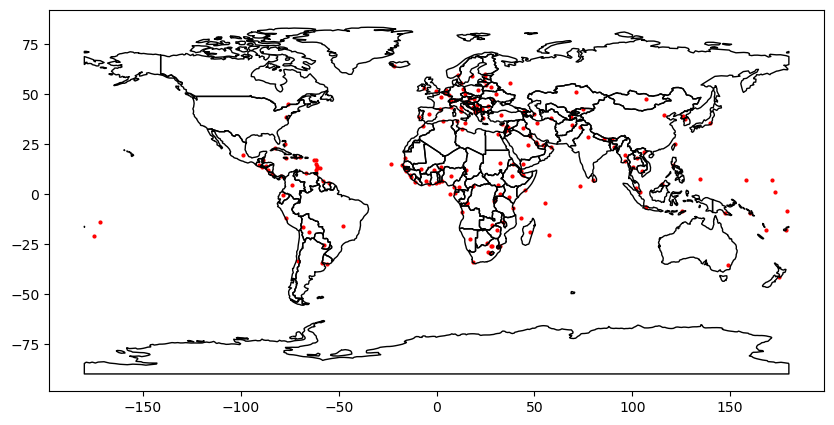

In [11]:
f, ax = plt.subplots(figsize=(10,7), ncols=1, nrows=1)
#careating base map using world data
base = worldmap.boundary.plot( edgecolor= 'black', ax= ax, linewidth=1 )
#ploting cities over base map
cities.plot(ax=base, marker='o', color='red', markersize=4)

## 3. Normal ploring vs Logarithmic Plotting Techniques
examples below are using an attributed value

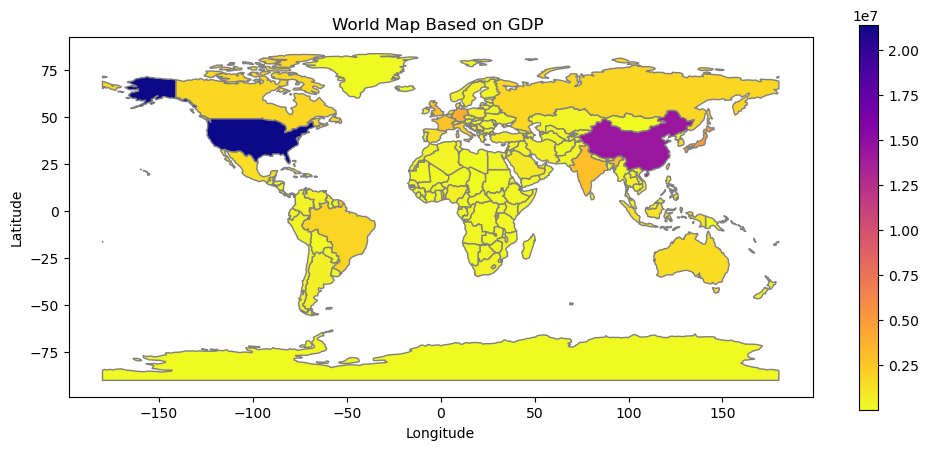

In [12]:
# Noraml ploting 

# Importing libraries
import geopandas as gpd
import matplotlib.pyplot as plt

#reading data World 
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Ploting world map using 
fig, ax = plt.subplots(figsize=(12,5), ncols=1, nrows=1)
worldmap.plot(column= 'gdp_md_est', cmap='plasma_r',
              legend= True, ax= ax,
              edgecolor='gray')

ax.set_title('World Map Based on GDP ')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

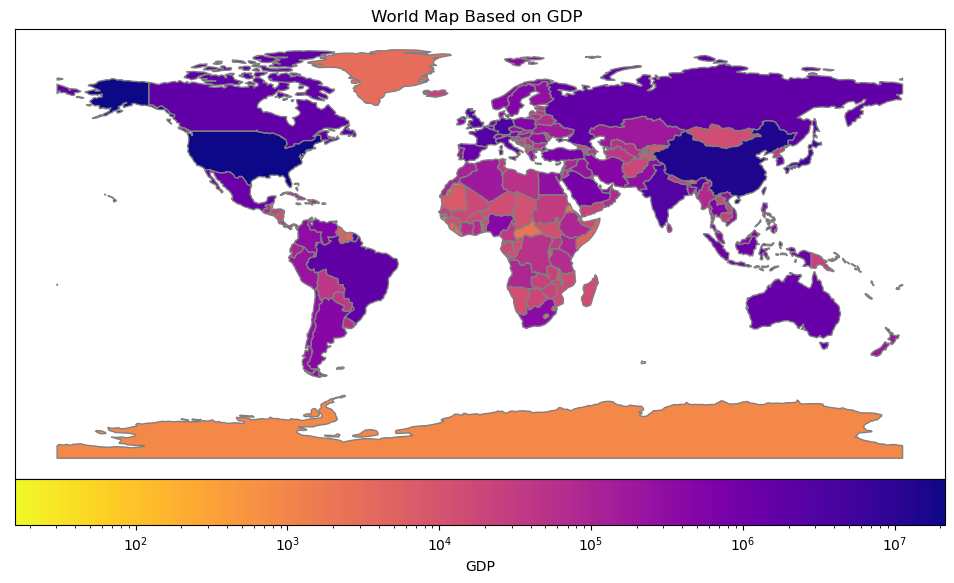

In [2]:
# Logarithmic Plotting 

# Loading LogNorml, ScalarMappable libraries 
from matplotlib.colors import LogNorm
from matplotlib.cm import ScalarMappable

fig, ax = plt.subplots(figsize=(12, 7), ncols= 1, nrows=1)
data = worldmap.gdp_md_est
norm = LogNorm(vmin= min(data), vmax= max(data))

worldmap.plot(column= 'gdp_md_est', cmap= 'plasma_r',
             ax= ax, edgecolor= 'gray', norm = norm)

# creating a custume colorbar
cbar = fig.colorbar(ScalarMappable(norm= norm, cmap= 'plasma_r'),
                                  ax = ax, orientation= 'horizontal', pad =0, 
                                  label= 'GDP')

ax.set_title('World Map Based on GDP ')
ax.set_yticks([])
ax.set_xticks([])
plt.show()